In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\lenovo\Desktop\marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [75]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.strip()
#df.columns = df.columns.str.replace(' ', '')

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

# Transform income column to a numerical
df['Income'] = df['Income'].str.replace(',','').str.replace('$','').astype('float')
#df['Income'] = df['Income'].str.replace(r'\D', '').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

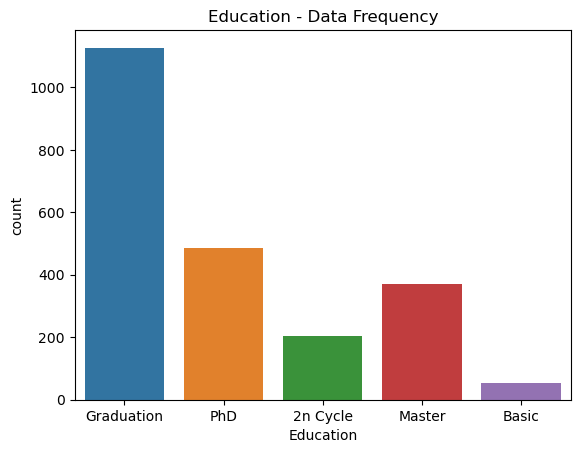

Number of samples According to Education 
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [76]:
##  Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

# Number of samples according to Education
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

In [77]:
# Replace '2n cycle' with 'master'
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) == '2n Cycle' else str(x))
# Replace 'graduation' with 'undergraduate'
df['Education'] = df['Education'].apply(lambda x: 'Undergraduate' if str(x) == 'Graduation' else str(x))

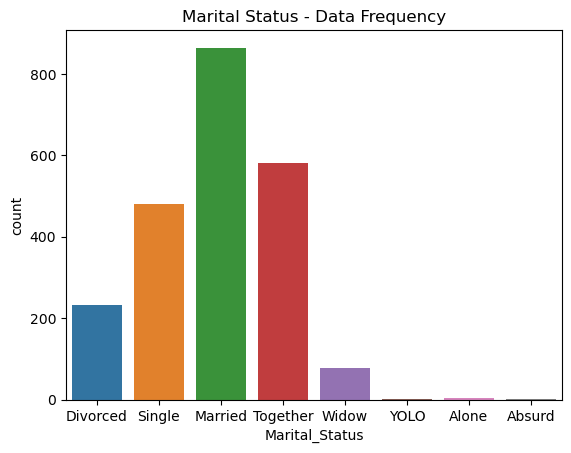

Number of samples According to Marital status 
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [78]:
# Number of samples according to Marital status
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In [79]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'YOLO', 'Absurd'] else str(x))

In [80]:
df['Country'].value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

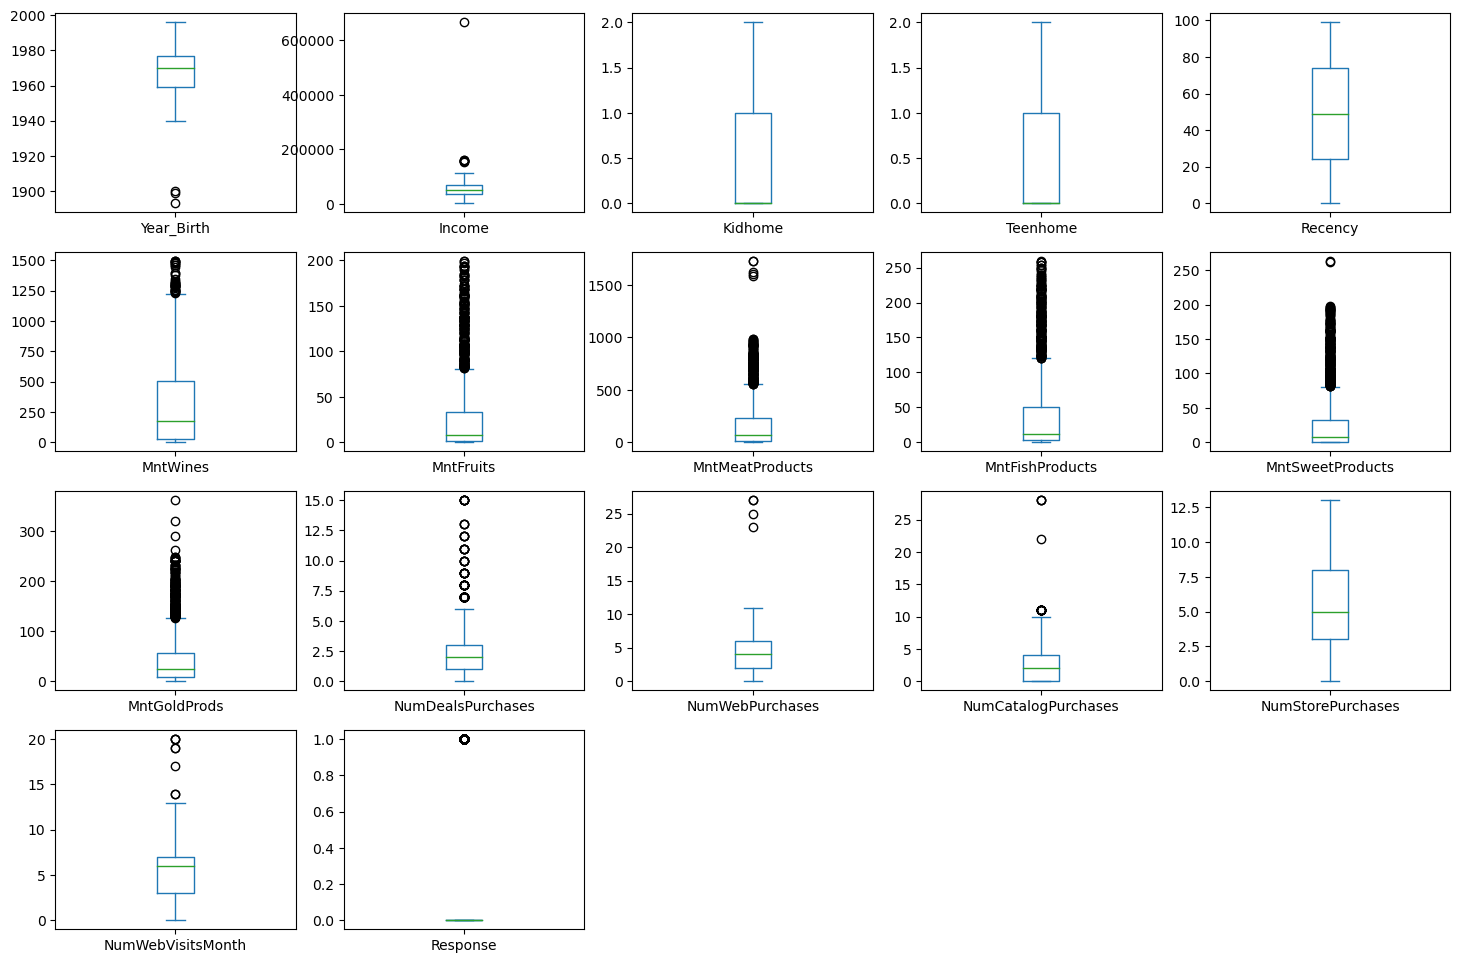

In [82]:
df2 = df.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain'],axis=1)
numeric_cols = df2.select_dtypes(include=['number']).columns
df[numeric_cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()

<Axes: >

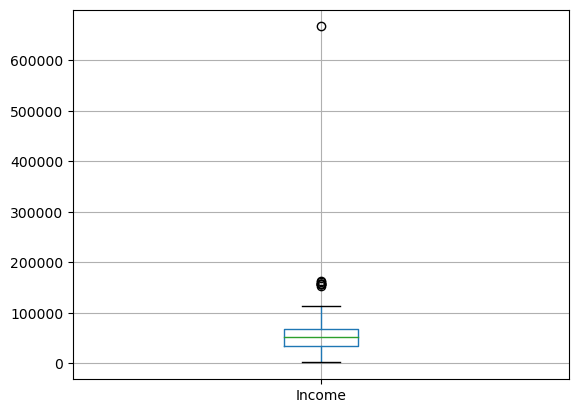

In [83]:
df.boxplot('Income')

<Axes: >

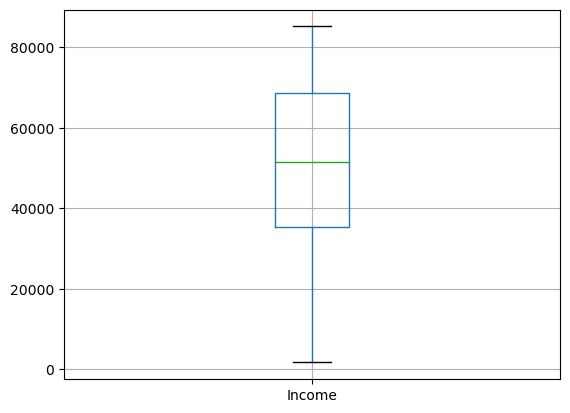

In [84]:
#Removing outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

# df = df.drop(df[df['Year_Birth'] <= 1900].index)
# df = df.drop(df[df['Income'] > 600000].index)

<Axes: >

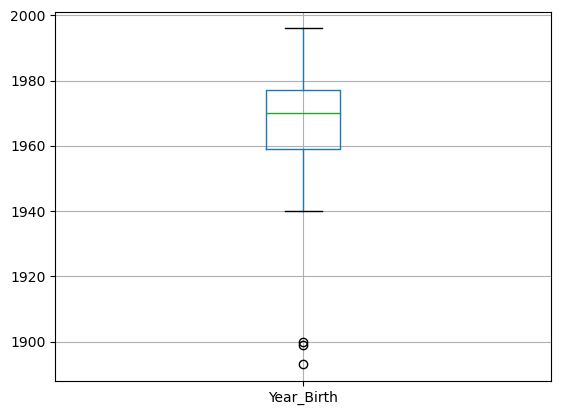

In [85]:
df.boxplot('Year_Birth')

<Axes: >

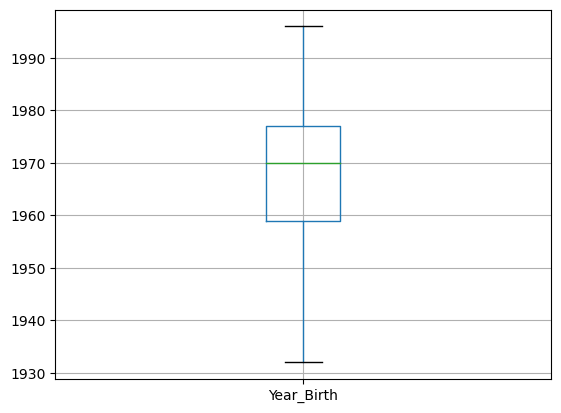

In [86]:
#Removing outliers from year of birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < LB, LB, inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

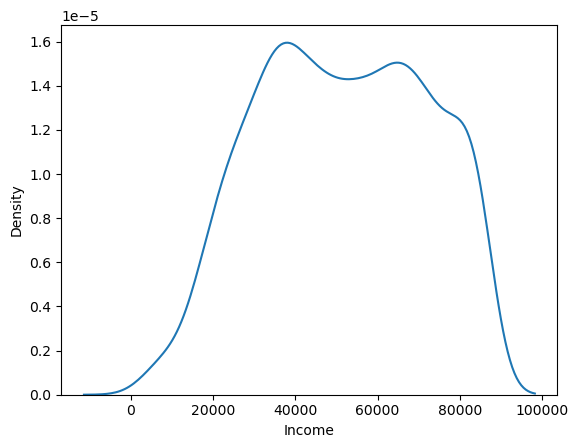

In [87]:
# Distribution of Income
sns.kdeplot(data=df, x="Income")

In [88]:
## Assume that the customers with similar education and marital status make the same yearly income, 
## on average. You may have to clean the data before performing this. 
## For data cleaning, look into the categories of education and marital status.

# check the null data

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [91]:
#Replacing Missing values based on Education and Marital Status
unique_Education = pd.unique(df.Education)
unique_MStatus=pd.unique(df.Marital_Status)
temp_data = df.copy()  # set temp_data variable to avoid losing real data

all_data_mean = np.round(np.mean(temp_data['Income']), 2)

for q in unique_Education:
    for m in unique_MStatus:
        filter = (temp_data.Education == q) & ( temp_data.Marital_Status == m)
        filtered_data = temp_data[filter]
        
        mean = np.round(np.mean(filtered_data['Income']), 2)
        
        if ~np.isnan(mean): 
            filtered_data['Income'] = filtered_data['Income'].fillna(mean)
            print(f"Missing Value in 'Income' column filled with {mean} when Education:{q} and Marital Status: {m}")
        else: 
            filtered_data['Income'] = filtered_data['Income'].fillna(all_data_mean)
            print(f"Missing Value in 'Income' column filled with {all_data_mean} when Education:{q} and Marital Status: {m}")
        
        temp_data[filter] = filtered_data
    
df = temp_data.copy()

Missing Value in 'Income' column filled with 53757.41 when Education:Undergraduate and Marital Status: Divorced
Missing Value in 'Income' column filled with 51003.34 when Education:Undergraduate and Marital Status: Single
Missing Value in 'Income' column filled with 50640.89 when Education:Undergraduate and Marital Status: Married
Missing Value in 'Income' column filled with 53194.21 when Education:Undergraduate and Marital Status: Together
Missing Value in 'Income' column filled with 54962.7 when Education:Undergraduate and Marital Status: Widow
Missing Value in 'Income' column filled with 52932.54 when Education:PhD and Marital Status: Divorced
Missing Value in 'Income' column filled with 52535.13 when Education:PhD and Marital Status: Single
Missing Value in 'Income' column filled with 56819.74 when Education:PhD and Marital Status: Married
Missing Value in 'Income' column filled with 55168.3 when Education:PhD and Marital Status: Together
Missing Value in 'Income' column filled wit

In [92]:
# check the null data
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [93]:
import datetime
# Age from birthyear
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
# Total number of dependents in the household
df['Children_Count'] = df['Kidhome'] + df['Teenhome']
# Total spending
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [94]:
df = df.drop(['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],axis=1)

In [95]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Country', 'Age', 'Children_Count',
       'TotalSpending'],
      dtype='object')

In [97]:
df.Education.unique().tolist()

['Undergraduate', 'PhD', 'Master', 'Basic']

In [98]:
# Ordinal encoding for 'Education'
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({"Levels":df.Education.unique().tolist()})
encoder = OrdinalEncoder(categories=[df.Education.unique().tolist()])
df['Education1']=encoder.fit_transform(df[['Education']])
print(encoder.categories_)

# for categorical variables use OneHotEncoder
df = pd.get_dummies(df, columns=[ "Marital_Status"])
df.head(3)

[array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)]


,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Country,Age,Children_Count,TotalSpending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,Undergraduate,84835.0,2014-06-16,0,189,104,379,111,189,218,...,SP,54,0,1190,0.0,True,False,False,False,False
1,Undergraduate,57091.0,2014-06-15,0,464,5,64,7,0,37,...,CA,63,0,577,0.0,False,False,True,False,False
2,Undergraduate,67267.0,2014-05-13,0,134,11,59,15,2,30,...,US,66,1,251,0.0,False,True,False,False,False


In [99]:
# lets check the correlation between variables through heatmap
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

ValueError: could not convert string to float: 'Undergraduate'

In [100]:
# lets check the highest correlation 
df.corr()['Response'].sort_values(ascending=False)

ValueError: could not convert string to float: 'Undergraduate'

In [101]:
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]


df_age.loc[(df_age['Age'] <= 25) , 'Age_Group'] = 'Young'
df_age.loc[(df_age['Age']  > 50) , 'Age_Group'] = 'Elderly'
df_age.loc[(df_age['Age']  > 25) & (df_age['Age'] <= 50) , 'Age_Group'] = 'Middle Age'


df_age.head()

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,54,4,6,Elderly
1,63,7,7,Elderly
2,66,3,5,Elderly
3,57,1,2,Elderly
4,35,3,2,Middle Age


In [102]:
df_age_plot=df_age[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).sum() # Age_Group as an index for plotting .reset_index() 
df_age_plot.head()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Elderly,6055,8411
Middle Age,3095,4559


<Axes: xlabel='Age_Group'>

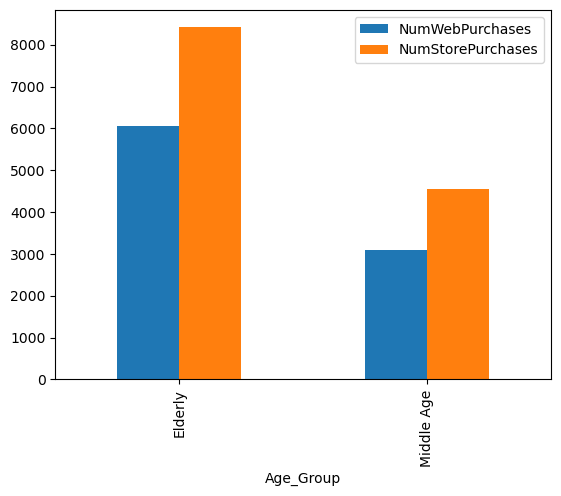

In [103]:
df_age_plot.plot.bar()

In [104]:
df_kids=df[['Children_Count','NumWebPurchases','NumStorePurchases']]
df_kids_plot= df_kids.groupby(["Children_Count"]).sum() #.reset_index() 
df_kids_plot.head()

,NumWebPurchases,NumStorePurchases
Children_Count,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Children_Count'>

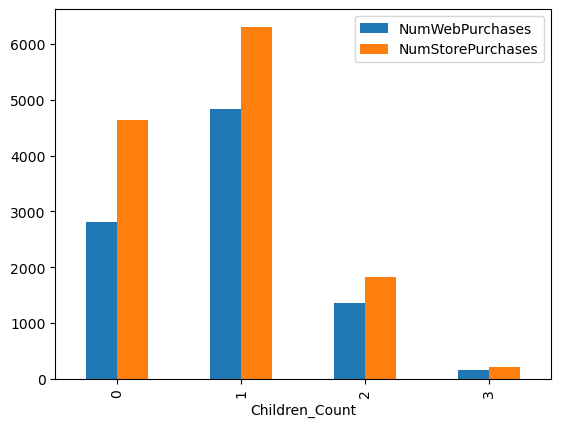

In [105]:
df_kids_plot.plot.bar()

([<matplotlib.patches.Wedge at 0x26430c7a250>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Instore')])

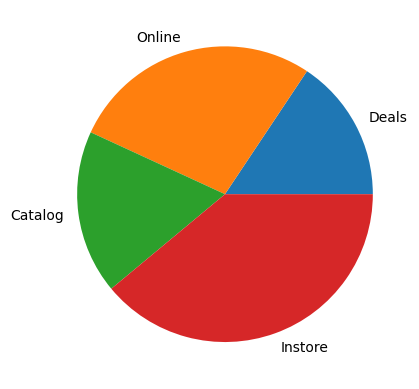

In [106]:
labels = ['Deals','Online','Catalog','Instore']
sizes = [df.NumDealsPurchases.sum(),
         df.NumWebPurchases.sum(),
         df.NumCatalogPurchases.sum(),
         df.NumStorePurchases.sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [107]:
df.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Country', 'Age', 'Children_Count', 'TotalSpending',
       'Education1', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [108]:
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP


In [110]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,SP,15


In [111]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
AUS,2314


In [112]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160


In [113]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [114]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [115]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0


In [116]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0


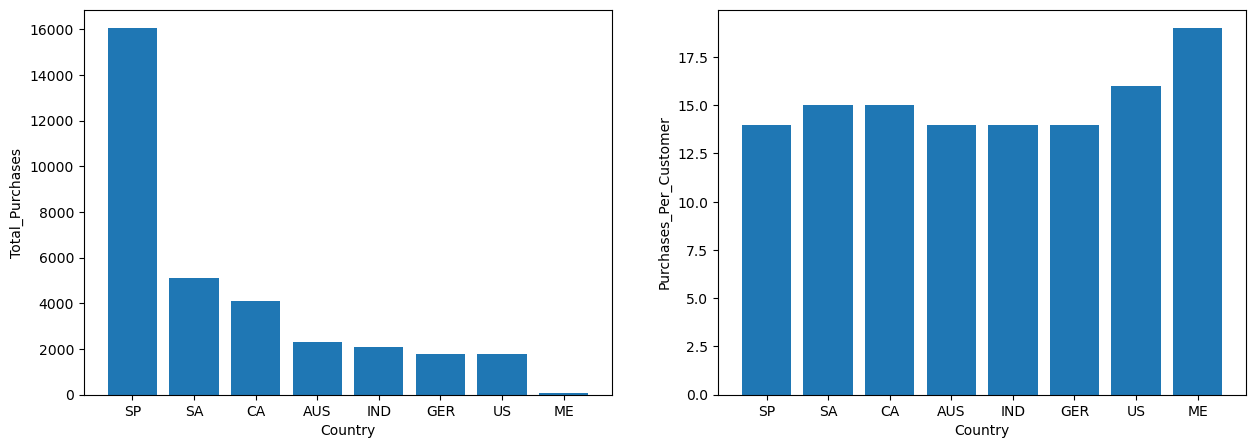

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = average_purchases_per_country['Country'], 
        height = average_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=10)
ax1.set_ylabel('Total_Purchases', fontsize='medium') 

ax2.bar(x = average_purchases_per_country['Country'],
       height = average_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium') 

plt.show()

In [ ]:
### In terms of total number of purchases, USA doesn't seem to be in a good position. In fact it is the lowest (excluding ME due to only 3 records). However if we look at the purchases made per person in a country, then USA tops the chart.